In [1]:
import numpy as np
import pandas as pd

**a) Total Number of .csv Files : 4**

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

**b) Shape of Movies Dataset :**

In [3]:
movies.shape

(9742, 3)

**c) Shape of Ratings Dataset :**

In [4]:
ratings.shape

(100836, 4)

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**d) Number of unique "userId" available in "ratings.csv":**

In [6]:
ratings['userId'].nunique()

610

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**e) Movie receiving maximum number of user ratings:**

In [10]:
movie_ratings = pd.merge(movies, ratings, on='movieId')
rating_count = movie_ratings.groupby('title')['rating'].count()
max_rating_movie = rating_count.idxmax()
max_rating_movie


'Forrest Gump (1994)'

**f) Tags submitted by users to "Matrix, The (1999)" movie:**

In [11]:
movies[movies.title == 'Matrix, The (1999)'].movieId

,movieId
1939,2571


In [12]:
matrix_tags = tags[tags.movieId == 2571]
matrix_tags


,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


**g) Average user rating for movie named "Terminator 2: Judgment Day (1991)":**

In [13]:
ratings_terminator2 = movie_ratings[movie_ratings.title == 'Terminator 2: Judgment Day (1991)']
average_rating = ratings_terminator2['rating'].mean()
print(average_rating)


3.970982142857143


**h) Data distribution of user ratings for "Fight Club (1999)" movie looks Right - Skewed:**

<Axes: >

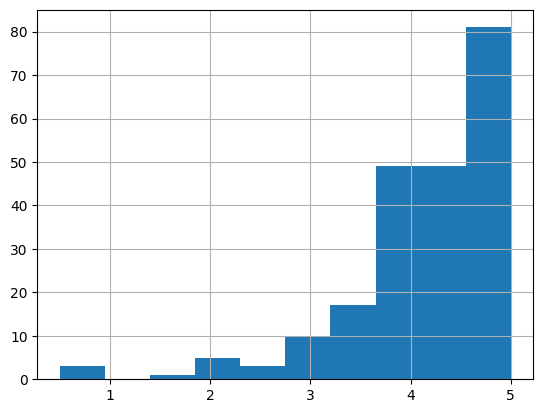

In [14]:
ratings_fightclub = movie_ratings[movie_ratings.title == 'Fight Club (1999)']
ratings_fightclub['rating'].hist()


<Axes: ylabel='Density'>

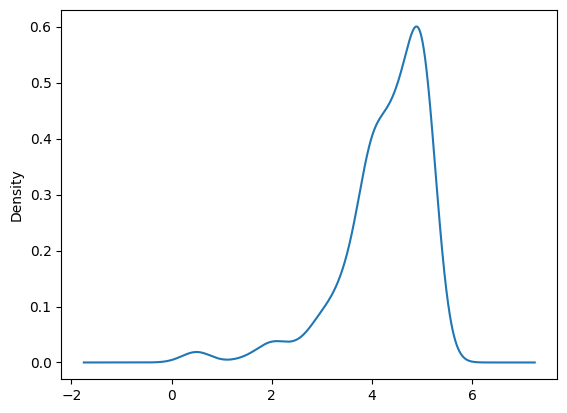

In [15]:
ratings_fightclub['rating'].plot.kde()

**MANDATORY OPERATIONS :**

- Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
- Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
- Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [16]:
# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

movie_user_rating = movie_ratings.groupby('movieId')['rating'].agg(['count','mean'])
movie_user_rating.head()

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [17]:
# Apply inner join on dataframe created from movies.csv and the grouped df from step 1

merged_df = pd.merge(movies, movie_user_rating, on='movieId', how='inner')
merged_df.head()


,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [18]:
# Filter only those movies which have more than 50 user ratings (i.e. > 50)

df = merged_df[merged_df['count'] > 50]
df.head()

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


**i) Most popular Movie based on average user ratings:**

In [19]:
df.sort_values(by=['mean'], ascending=False).head(1)

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


**j) Top 5 popular movies based on number of user ratings:**

In [20]:
df.sort_values(by=['count'], ascending=False).head(5)


,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


**k) "Third most popular" Sci-Fi Movie based on the number of user ratings:**

In [21]:
sci_fi_movies = df[df['genres'].str.contains('Sci-Fi')]
sci_fi_movies.sort_values(by=['count'], ascending=False).head()


,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


**WEB SCRAPING :**

- You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

- Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [22]:
import requests
import numpy as np
from bs4 import BeautifulSoup


def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

In [23]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [24]:
# links['imdb_rating'] = links['imdbId'].apply(scrapper)


**l) MovieId of the movie which has the highest IMDB rating : 356**

**m) MovieId of the "Sci-Fi" movie which has the highest IMDB rating: 110553**